http://python-for-multivariate-analysis.readthedocs.io/a_little_book_of_python_for_multivariate_analysis.html#reading-multivariate-analysis-data-into-python

http://sebastianraschka.com/Articles/2014_pca_step_by_step.html#sc_matrix

In [39]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

The wine data contains data on concentrations of 13 different chemicals in wines grown in the same region in Italy that are derived from three different cultivars, which are coded as 1, 2 and 3 in the dataset.

In [2]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None)

In [4]:
# rename column names 
data.columns = ["v" + str(i) for i in range(1, len(data.columns) + 1)]
# change to categorical variables
data.v1 = data.v1.astype(str)

In [16]:
# independent variables data
x = data.loc[:, "v2":]  
# dependent variables data
y = data.v1  
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### matrix scatterplot

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


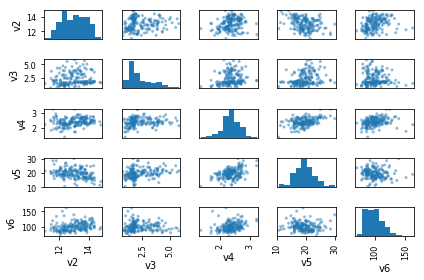

In [55]:
plt.figure(figsize = (10, 10))
pd.tools.plotting.scatter_matrix(data.loc[:, "v2":"v6"], diagonal = "hist")
plt.tight_layout()

plt.show()

### scatter plot with dat points labelled by their groups 

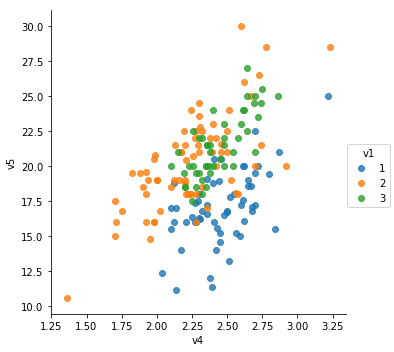

In [20]:
# as from the scatter plot above, v4 and v5 maybe correlated 

plt.figure(figsize = (10, 10))
sns.lmplot("v4", "v5", data, hue = "v1", fit_reg = False)

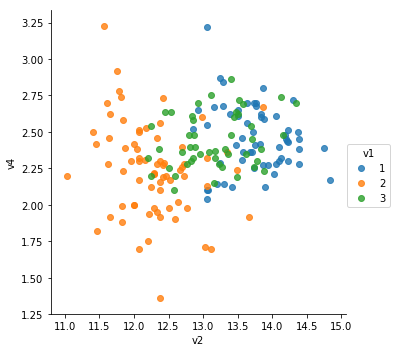

In [54]:
# as from the scatter plot above, v2 and v4 are less likely to be correlated 
plt.figure(figsize = (10, 10))

sns.lmplot("v2", "v4", data, hue = "v1", fit_reg = False)

### profile plot 
Another type of plot that is useful is a profile plot, which shows the variation in each of the variables, by plotting the value of each of the variables for each of the samples.

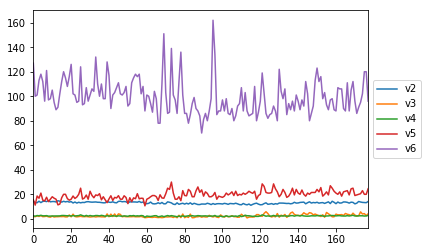

In [60]:
plt.figure(figsize = (10, 10))

fig = data.loc[:,"v2":"v6"].plot()
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
# interpretaion of axes in the profile plot 

### summary statistics for multivariate data

** apply** applies the passed argument function along the input axis of the **DataFrame**

In [31]:
x.apply(np.mean)

v2      13.000618
v3       2.336348
v4       2.366517
v5      19.494944
v6      99.741573
v7       2.295112
v8       2.029270
v9       0.361854
v10      1.590899
v11      5.058090
v12      0.957449
v13      2.611685
v14    746.893258
dtype: float64

In [33]:
x.apply(np.std)

v2       0.809543
v3       1.114004
v4       0.273572
v5       3.330170
v6      14.242308
v7       0.624091
v8       0.996049
v9       0.124103
v10      0.570749
v11      2.311765
v12      0.227929
v13      0.707993
v14    314.021657
dtype: float64

In order to compare the variables, they need to be standardised such that each variable has a sample variance of 1 and sample mean of 0.

In [34]:
### correlation for multivariate data 

In [41]:
# use scipy stats to get Pearson correlation coefficient and the p-value for testing non-correlation
corr = scipy.stats.pearsonr(x.v2, x.v3)
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.210081985971
cor:		 0.0943969409104


In [42]:
# or use pandas corr when there are too many variables
corrmax = x.corr()
corrmax

,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v2,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
v3,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
v4,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
v5,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
v6,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
v7,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
v8,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
v9,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
v10,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
v11,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


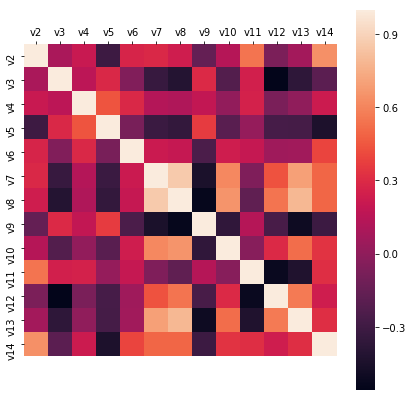

In [48]:
# heatmap - severity of correlation 

plt.figure(figsize = (7, 7))
sns.heatmap(corrmax, vmax = 1., square = True ).xaxis.tick_top()

plt.show()

In [79]:
## get group means and stds

def groupmeanandstd(variables, groupvariables):
    data_groupby = variables.groupby(groupvariables)
    print ("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))


In [81]:
groupmeanandstd(x, y)

## Means:


,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,,,,,,,,,,,,,
1,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
2,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
3,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833



## Standard deviations:


,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,,,,,,,,,,,,,
1,0.458192,0.682689,0.225233,2.524651,10.409595,0.336077,0.394111,0.069453,0.408602,1.228032,0.115491,0.354038,219.635449
2,0.534162,1.008391,0.313238,3.326097,16.635097,0.541507,0.700713,0.123085,0.597813,0.918393,0.201503,0.493064,156.100173
3,0.524689,1.076514,0.182756,2.234515,10.776433,0.353233,0.290431,0.122840,0.404555,2.286743,0.113243,0.269262,113.891805



## Sample sizes:


,0
v1,
1,59
2,71
3,48


In [92]:
## between group variance and within group variance

def withingroupsvariance(variable, groupvariable):
    # find out how many levels the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # mean and std for each group
    numtotal = 0
    denomtotal = 0
    for level_i in levels:
        level_i_data = variable[groupvariable == level_i]
        level_i_length = len(level_i_data)
        # std for group i 
        sd_i = np.std(level_i_data)
        num_i = (level_i_length) * sd_i ** 2
        denom_i = level_i_length
        numtotal = numtotal + num_i
        denomtotal = denomtotal + denom_i
        
    # within group variance
    within_varince = numtotal /(denomtotal - numlevels)
    
    return within_varince

In [95]:
#  within-groups variance of the variable v2
withingroupsvariance(x.v2, y)
withingroupsvariance(x, y)

v2         0.262052
v3         0.887547
v4         0.066072
v5         8.006811
v6       180.657773
v7         0.191270
v8         0.274708
v9         0.011912
v10        0.246173
v11        2.284923
v12        0.024488
v13        0.160779
v14    29707.681871
dtype: float64

In [98]:
## between groups variance 

def BetweenGroupsVariance(variable, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set((groupvariable)))
    numlevels = len(levels)
    # calculate the overall grand mean:
    grandmean = np.mean(variable)
    # get the mean and standard deviation for each group:
    numtotal = 0
    denomtotal = 0
    for leveli in levels:
        levelidata = variable[groupvariable==leveli]
        levelilength = len(levelidata)
        # get the mean and standard deviation for group i:
        meani = np.mean(levelidata)
        sdi = np.std(levelidata)
        numi = levelilength * ((meani - grandmean)**2)
        denomi = levelilength
        numtotal = numtotal + numi
        denomtotal = denomtotal + denomi
    # calculate the between-groups variance
    Vb = numtotal / (numlevels - 1)
    return(Vb)

In [99]:
BetweenGroupsVariance(x, y)

v2     3.539742e+01
v3     3.278902e+01
v4     8.796114e-01
v5     2.864167e+02
v6     2.245501e+03
v7     1.792836e+01
v8     6.426120e+01
v9     3.284702e-01
v10    7.451996e+00
v11    2.757080e+02
v12    2.481010e+00
v13    3.054351e+01
v14    6.176832e+06
dtype: float64

In [102]:
## separation - between-groups variance devided by the variable's within-groups variance

def Separations(variables, groupvariable):
    # calculate the separation for each variable
    for variablename in variables:
        variablei = variables[variablename]
        Vw = calcWithinGroupsVariance(variablei, groupvariable)
        Vb = calcBetweenGroupsVariance(variablei, groupvariable)
        sep = Vb/Vw
        print("variable", variablename, "Vw=", Vw, "Vb=", Vb, "separation=", sep)

In [103]:
#  the purpose of linear discriminant analysis (LDA) is to find the linear combination of the individual variables that will give the greatest separation between the groups (cultivars here)
Separations(x, y)


variable v2 Vw= 0.262052469154 Vb= 35.3974249603 separation= 135.077624243
variable v3 Vw= 0.887546796747 Vb= 32.7890184869 separation= 36.9434249632
variable v4 Vw= 0.0660721013425 Vb= 0.879611357249 separation= 13.3129012
variable v5 Vw= 8.00681118121 Vb= 286.416746363 separation= 35.7716374073
variable v6 Vw= 180.657773164 Vb= 2245.50102789 separation= 12.4295843381
variable v7 Vw= 0.191270475224 Vb= 17.9283572943 separation= 93.7330096204
variable v8 Vw= 0.274707514337 Vb= 64.2611950236 separation= 233.925872682
variable v9 Vw= 0.0119117022133 Vb= 0.328470157462 separation= 27.575417147
variable v10 Vw= 0.246172943796 Vb= 7.45199550778 separation= 30.2713831702
variable v11 Vw= 2.28492308133 Vb= 275.708000822 separation= 120.664018441
variable v12 Vw= 0.0244876469432 Vb= 2.48100991494 separation= 101.31679539
variable v13 Vw= 0.160778729561 Vb= 30.5435083544 separation= 189.972320579
variable v14 Vw= 29707.6818705 Vb= 6176832.32228 separation= 207.920373902


In [104]:
## between groups and within group covariance 

def calcWithinGroupsCovariance(variable1, variable2, groupvariable):
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    Covw = 0.0
    # get the covariance of variable 1 and variable 2 for each group:
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        # get the covariance for this group:
        term1 = 0.0
        for levelidata1j, levelidata2j in zip(levelidata1, levelidata2):
            term1 += (levelidata1j - mean1)*(levelidata2j - mean2)
        Cov_groupi = term1 # covariance for this group
        Covw += Cov_groupi
    totallength = len(variable1)
    Covw /= totallength - numlevels
    return Covw

In [106]:
calcWithinGroupsCovariance(x.v8, x.v11, y)

0.28667830215140194

In [108]:
def calcBetweenGroupsCovariance(variable1, variable2, groupvariable):
    # find out how many values the group variable can take
    levels = sorted(set(groupvariable))
    numlevels = len(levels)
    # calculate the grand means
    variable1mean = np.mean(variable1)
    variable2mean = np.mean(variable2)
    # calculate the between-groups covariance
    Covb = 0.0
    for leveli in levels:
        levelidata1 = variable1[groupvariable==leveli]
        levelidata2 = variable2[groupvariable==leveli]
        mean1 = np.mean(levelidata1)
        mean2 = np.mean(levelidata2)
        levelilength = len(levelidata1)
        term1 = (mean1 - variable1mean) * (mean2 - variable2mean) * levelilength
        Covb += term1
    Covb /= numlevels - 1
    return Covb

In [109]:
calcBetweenGroupsCovariance(x.v8, x.v11, y)

-60.410774835916207

Thus, for V8 and V11, the between-groups covariance is -60.41 and the within-groups covariance is 0.29. Since the within-groups covariance is positive (0.29), it means V8 and V11 are positively related within groups: for individuals from the same group, individuals with a high value of V8 tend to have a high value of V11, and vice versa. Since the between-groups covariance is negative (-60.41), V8 and V11 are negatively related between groups: groups with a high mean value of V8 tend to have a low mean value of V11, and vice versa.

### standadizing variables 


In [59]:
# standerdize the original data variables, especially when the input variables have different variance,
# and create a new df to store the standerdized variables

from sklearn.preprocessing import scale 

stdx = scale(x)
stdx = pd.DataFrame(stdx, index = x.index, columns = x.columns)

In [67]:
stdx.apply(np.mean),
stdx.apply(np.std)

v2     1.0
v3     1.0
v4     1.0
v5     1.0
v6     1.0
v7     1.0
v8     1.0
v9     1.0
v10    1.0
v11    1.0
v12    1.0
v13    1.0
v14    1.0
dtype: float64

### PCA

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the case of the wine data set, we have 13 chemical concentrations describing **wine samples** from three different cultivars. We can carry out a principal component analysis to investigate whether we can capture most of the variation **between samples** using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 13 chemical concentrations.

Principal Component Analysis (PCA) Vs. Multiple Discriminant Analysis (MDA)

Both Multiple Discriminant Analysis (MDA) and Principal Component Analysis (PCA) are linear transformation methods and closely related to each other. In PCA, we are interested to find the directions (components) that maximize the variance in our dataset, where in MDA, we are additionally interested to find the directions that maximize the separation (or discrimination) between different classes (for example, in pattern classification problems where our dataset consists of multiple classes. In contrast two PCA, which ignores the class labels).

In other words, via PCA, we are projecting the entire set of data (without class labels) onto a different subspace, and in MDA, we are trying to determine a suitable subspace to distinguish between patterns that belong to different classes. Or, roughly speaking in PCA we are trying to find the axes with maximum variances where the data is most spread (within a class, since PCA treats the whole data set as one class), and in MDA we are additionally maximizing the spread between classes.

In typical pattern recognition problems, a PCA is often followed by an MDA.

Steps:
- Take the whole dataset consisting of d-dimensional samples ignoring the class labels
- Compute the d-dimensional mean vector (i.e., the means for every dimension of the whole dataset)
- Compute the scatter matrix (alternatively, the covariance matrix) of the whole data set
- Compute eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd)
- Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W(where every column represents an eigenvector)
- Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: y = W Transpose × x (where x is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)


In [68]:
from sklearn.decomposition import PCA
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space.
# helP(PCA)

In [110]:
pca = PCA().fit(stdx)

In [118]:
# PCA summary function - where the input variable pca is a PCA object

def pca_summary(pca, standardised_data, out = True):
    names = ["PC" + str(i) for i in range(1, len(pca.explained_variance_ratio_) +  1)]
    a = list(np.std(pca.transform(standardised_data), axis = 0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_) + 1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index = names, columns = columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [119]:
summary = pca_summary(pca, stdx)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.169297,0.361988,0.361988
PC2,1.580182,0.192075,0.554063
PC3,1.202527,0.111236,0.665300
PC4,0.958631,0.070690,0.735990
PC5,0.923704,0.065633,0.801623
PC6,0.801035,0.049358,0.850981
PC7,0.742313,0.042387,0.893368
PC8,0.590337,0.026807,0.920175
PC9,0.537476,0.022222,0.942397


The above gives us the standard deviation of each component, and the proportion of variance explained by each component. 

In [120]:
# The standard deviation of the components is stored in a named row called sdev of the output variable made by the pca_summary function
summary.sdev


,Standard deviation
PC1,2.169297
PC2,1.580182
PC3,1.202527
PC4,0.958631
PC5,0.923704
PC6,0.801035
PC7,0.742313
PC8,0.590337
PC9,0.537476
PC10,0.500902


In [122]:
# The total variance explained by the components is the sum of the variances of the components
# As the variables are standerdized before apply PCA, the total amount of variance explained by the components should be 13.
np.sum(summary.sdev** 2)

Standard deviation    13.0
dtype: float64

### decide the number of components to use


In [127]:
def screeplot(pca, standardised_values):
    fig = plt.figure(figsize = (10, 10))
    y = np.std(pca.transform(standardised_values), axis = 0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp." + str(i) for i in x], rotation = 60)
    plt.ylabel("Variance")
    plt.show()

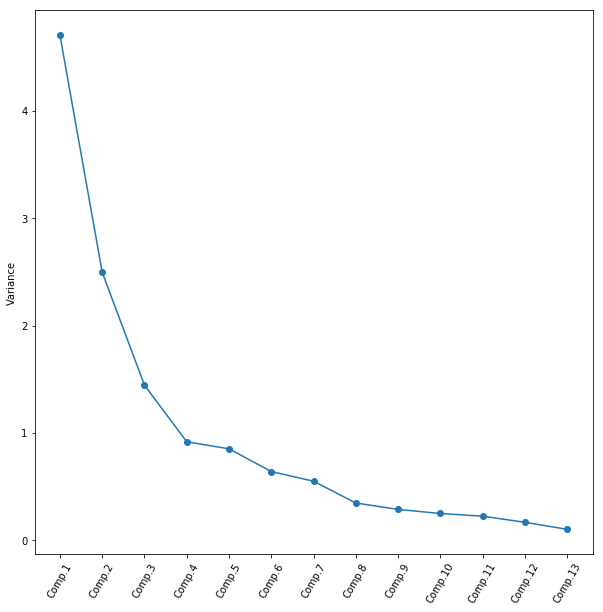

In [130]:
screeplot(pca, stdx)

The most obvious change in slope in the scree plot occurs at component 4, which is the “elbow” of the scree plot. Therefore, it cound be argued based on the basis of the scree plot that the first three components should be retained.

Another way of deciding how many components to retain is to use Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [131]:
summary.sdev ** 2

,Standard deviation
PC1,4.705850
PC2,2.496974
PC3,1.446072
PC4,0.918974
PC5,0.853228
PC6,0.641657
PC7,0.551028
PC8,0.348497
PC9,0.288880
PC10,0.250902


A third way to decide how many principal components to retain is to decide to keep the number of components required to explain at least some minimum amount of the total variance. 

In [133]:
summary.cumprop

,Cumulative Proportion
PC1,0.361988
PC2,0.554063
PC3,0.665300
PC4,0.735990
PC5,0.801623
PC6,0.850981
PC7,0.893368
PC8,0.920175
PC9,0.942397
PC10,0.961697


### loadings for principal components 

Loadings should not be confused with eigen values 
- Their sums of squares within each component are the eigenvalues (components' variances). 
- Loadings are coefficients in linear combination predicting a variable by the (standardized) components.


In [135]:
# to obtain the loadings for the first principal component
pca.components_[0]

array([ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
        0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
        0.29671456,  0.37616741,  0.28675223])

The first principal component has highest (in absolute value) loadings for V8 (-0.423), V7 (-0.395), V13 (-0.376), V10 (-0.313), V12 (-0.297), V14 (-0.287), V9 (0.299), V3 (0.245), and V5 (0.239). The loadings for V8, V7, V13, V10, V12 and V14 are negative, while those for V9, V3, and V5 are positive. Therefore, an interpretation of the first principal component is that it represents a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5.

In [136]:
# sum of squared of the loadings within each component is eigenvalues i.e. components' variances.
np.sum(pca.components_[0]**2)

1.0

In [149]:
## and loadings for the second principal component
pca.components_[1]

array([-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
       -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
        0.27923515,  0.16449619, -0.36490283])

In [137]:
## calculate values of the first principal component 

def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        value_i = 0
        for j in range(numvariables):
            value_ij = variables.iloc[i, j]
            loading_j = loadings[j]
            value_i = value_i + (value_ij * loading_j)
        pc[i] = value_i
    return pc

In [141]:
# calculate the values of the first principal component for each sample in the wine data

calcpc(stdx, pca.components_[0])

# which gives the same result as pca.transform(stdx)[:, 0] does

array([ 3.31675081,  2.20946492,  2.51674015,  3.75706561,  1.00890849,
        3.05025392,  2.44908967,  2.05943687,  2.5108743 ,  2.75362819,
        3.47973668,  1.7547529 ,  2.11346234,  3.45815682,  4.31278391,
        2.3051882 ,  2.17195527,  1.89897118,  3.54198508,  2.0845222 ,
        3.12440254,  1.08657007,  2.53522408,  1.64498834,  1.76157587,
        0.9900791 ,  1.77527763,  1.23542396,  2.18840633,  2.25610898,
        2.50022003,  2.67741105,  1.62857912,  1.90269086,  1.41038853,
        1.90382623,  1.38486223,  1.12220741,  1.5021945 ,  2.52980109,
        2.58809543,  0.66848199,  3.07080699,  0.46220914,  2.10135193,
        1.13616618,  2.72660096,  2.82133927,  2.00985085,  2.7074913 ,
        3.21491747,  2.85895983,  3.50560436,  2.22479138,  2.14698782,
        2.46932948,  2.74151791,  2.17374092,  3.13938015, -0.92858197,
       -1.54248014, -1.83624976,  0.03060683,  2.05026161, -0.60968083,
        0.90022784,  2.24850719,  0.18338403, -0.81280503,  1.97

In [144]:
data.groupby('v1').count()

,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,,,,,,,,,,,,,
1,59,59,59,59,59,59,59,59,59,59,59,59,59
2,71,71,71,71,71,71,71,71,71,71,71,71,71
3,48,48,48,48,48,48,48,48,48,48,48,48,48


### scatterplot of principal components 

The values of the principal components can be computed by the transform() (or fit_transform()) method of the PCA class. It returns a matrix with the principal components, where the first column in the matrix contains the first principal component, the second column the second component, and so on.

Thus, in this wine sample study, pca.transform(stdx)[:, 0] contains the first principal component, and pca.transform(stdx)[:, 1] contains the second principal component.



In [146]:
## scatterplot of the first two principal components, 
## and label the data points with the cultivar that the wine samples come from

def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 1], classifs)), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

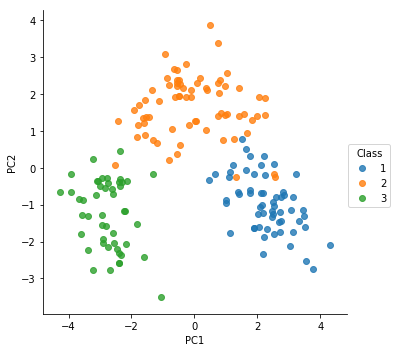

In [147]:
pca_scatter(pca, stdx, y)

The scatterplot shows the first principal component on the x-axis, and the second principal component on the y-axis. It can be seen that the wine samples of cultivar 1 have much lower values of the first principal component than wine samples of cultivar 3. Therefore, the first principal component separates wine samples of cultivars 1 from those of cultivar 3.

It can also been seen that wine samples of cultivar 2 have much higher values of the second principal component than wine samples of cultivars 1 and 3. Therefore, the second principal component separates samples of cultivar 2 from samples of cultivars 1 and 3.

Therefore, the first two principal components are reasonably useful for distinguishing wine samples of the three different cultivars.

It has been interpreted above that the first principal component is a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5. Whether this makes sense in terms of the concentrations of these chemicals in the different cultivars can be checked by printing out the means of the standardised concentration variables in each cultivar.

In [148]:
groupmeanandstd(stdx, y)

## Means:


,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,,,,,,,,,,,,,
1,0.919195,-0.292342,0.325604,-0.737997,0.463226,0.873362,0.956884,-0.578985,0.540383,0.203401,0.458847,0.771351,1.174501
2,-0.891720,-0.362362,-0.444958,0.223137,-0.364567,-0.058067,0.051780,0.014569,0.069002,-0.852799,0.433611,0.245294,-0.724110
3,0.189159,0.895331,0.257945,0.577065,-0.030127,-0.987617,-1.252761,0.690119,-0.766287,1.011418,-1.205382,-1.310950,-0.372578



## Standard deviations:


,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14
v1,,,,,,,,,,,,,
1,0.565989,0.612825,0.823302,0.758115,0.730892,0.538506,0.395674,0.559639,0.715905,0.531210,0.506699,0.500058,0.699428
2,0.659832,0.905196,1.144991,0.998777,1.168006,0.867674,0.703493,0.991797,1.047418,0.397269,0.884060,0.696425,0.497100
3,0.648130,0.966347,0.668036,0.670991,0.756649,0.565996,0.291583,0.989818,0.708814,0.989176,0.496834,0.380317,0.362688



## Sample sizes:


,0
v1,
1,59
2,71
3,48


Does it make sense that the first principal component can separate cultivar 1 from cultivar 3? In cultivar 1, the mean values of V8 (0.954), V7 (0.871), V13 (0.769), V10 (0.539), V12 (0.458) and V14 (1.171) are very high compared to the mean values of V9 (-0.577), V3 (-0.292) and V5 (-0.736). In cultivar 3, the mean values of V8 (-1.249), V7 (-0.985), V13 (-1.307), V10 (-0.764), V12 (-1.202) and V14 (-0.372) are very low compared to the mean values of V9 (0.688), V3 (0.893) and V5 (0.575). Therefore, it does make sense that principal component 1 is a contrast between the concentrations of V8, V7, V13, V10, V12, and V14, and the concentrations of V9, V3 and V5; and that principal component 1 can separate cultivar 1 from cultivar 3.

Above, we intepreted the second principal component as a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12. In the light of the mean values of these variables in the different cultivars, does it make sense that the second principal component can separate cultivar 2 from cultivars 1 and 3? In cultivar 1, the mean values of V11 (0.203), V2 (0.917), V14 (1.171), V4 (0.325), V6 (0.462) and V3 (-0.292) are not very different from the mean value of V12 (0.458). In cultivar 3, the mean values of V11 (1.009), V2 (0.189), V14 (-0.372), V4 (0.257), V6 (-0.030) and V3 (0.893) are also not very different from the mean value of V12 (-1.202). In contrast, in cultivar 2, the mean values of V11 (-0.850), V2 (-0.889), V14 (-0.722), V4 (-0.444), V6 (-0.364) and V3 (-0.361) are much less than the mean value of V12 (0.432). Therefore, it makes sense that principal component is a contrast between the concentrations of V11, V2, V14, V4, V6 and V3, and the concentration of V12; and that principal component 2 can separate cultivar 2 from cultivars 1 and 3.

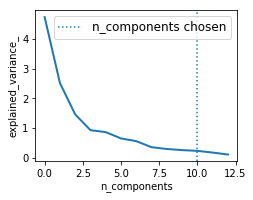

In [155]:

from sklearn import linear_model, decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])


# Plot the PCA spectrum
pca.fit(stdx)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

# Prediction
n_components = [3, 7, 10]
Cs = np.logspace(-4, 4, 3)

# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(pipe, dict(pca__n_components = n_components, logistic__C = Cs))
estimator.fit(stdx, y)

plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components, linestyle = ':', label = 'n_components chosen')
plt.legend(prop = dict(size = 12))
plt.show()

In [150]:
# LDA is discussed in the second half from the link at the very top